# Business Proposal

We are modelling the dataset to predict the price of cars. It can be used to understand how exactly the prices vary with the independent variables and can accordingly manipulate the business strategy to meet cretain price levels. Thus, the target variable is price and the independent variables include fuel type, engine type, horsepower, citympg, etc (categorical and numerical). We are determining which variables are significant in predicting the price of a car and  how well those variables describe the price of a car.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/jezzg/OneDrive/Documents/Jess-St Lawrence/3rd sem/Applied AI and machine learning/Project/CarPrice_Assignment.csv")

# Understanding dataset

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.shape

(205, 26)

In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Cleaning

In [13]:
#Changing the variable CarName to CarCompany inorder to make it precise

In [10]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
# Correcting the spelling errors in Companyname

In [11]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
df.CompanyName = df.CompanyName.str.lower()

def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [18]:
# Checking for missing values

In [13]:
df.isnull().sum()

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Visualising Few Categorical variables

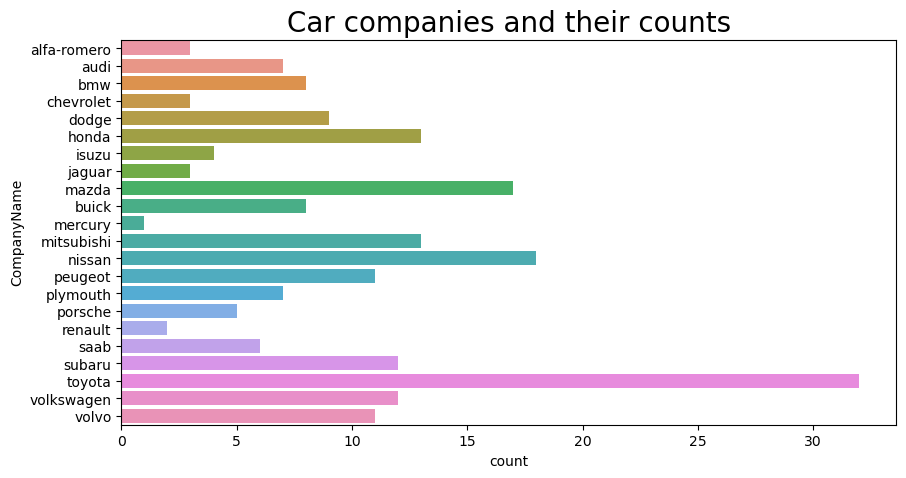

In [14]:
# Car Companies
plt.figure(figsize = (10, 5))
sns.countplot(y = df.CompanyName)
plt.title("Car companies and their counts", fontsize = 20)
plt.show()

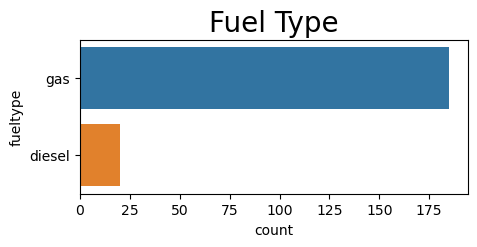

In [15]:
# Fuel Type
plt.figure(figsize = (5,2))
sns.countplot(y = df.fueltype)
plt.title("Fuel Type", fontsize = 20)
plt.show()

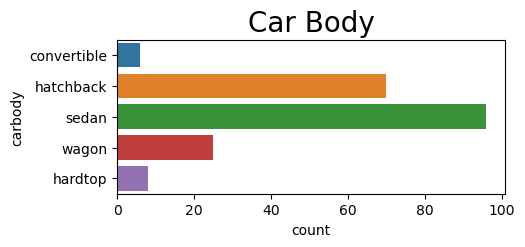

In [17]:
# Car Body
plt.figure(figsize = (5,2))
sns.countplot(y = df.carbody)
plt.title("Car Body", fontsize = 20)
plt.show()

# Relation of Categorical variables with Price

C:\Users\jezzg\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


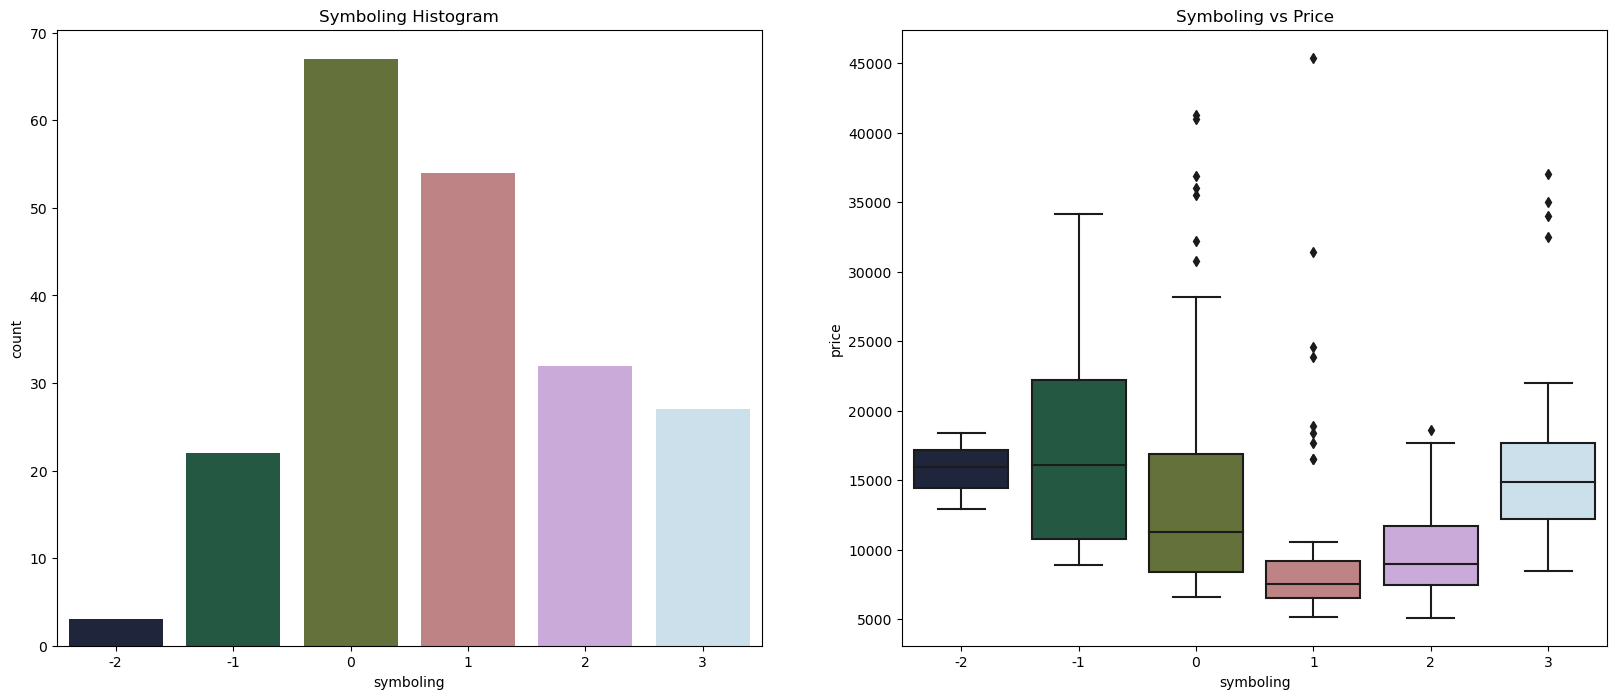

In [25]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(df.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))

plt.show()

C:\Users\jezzg\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


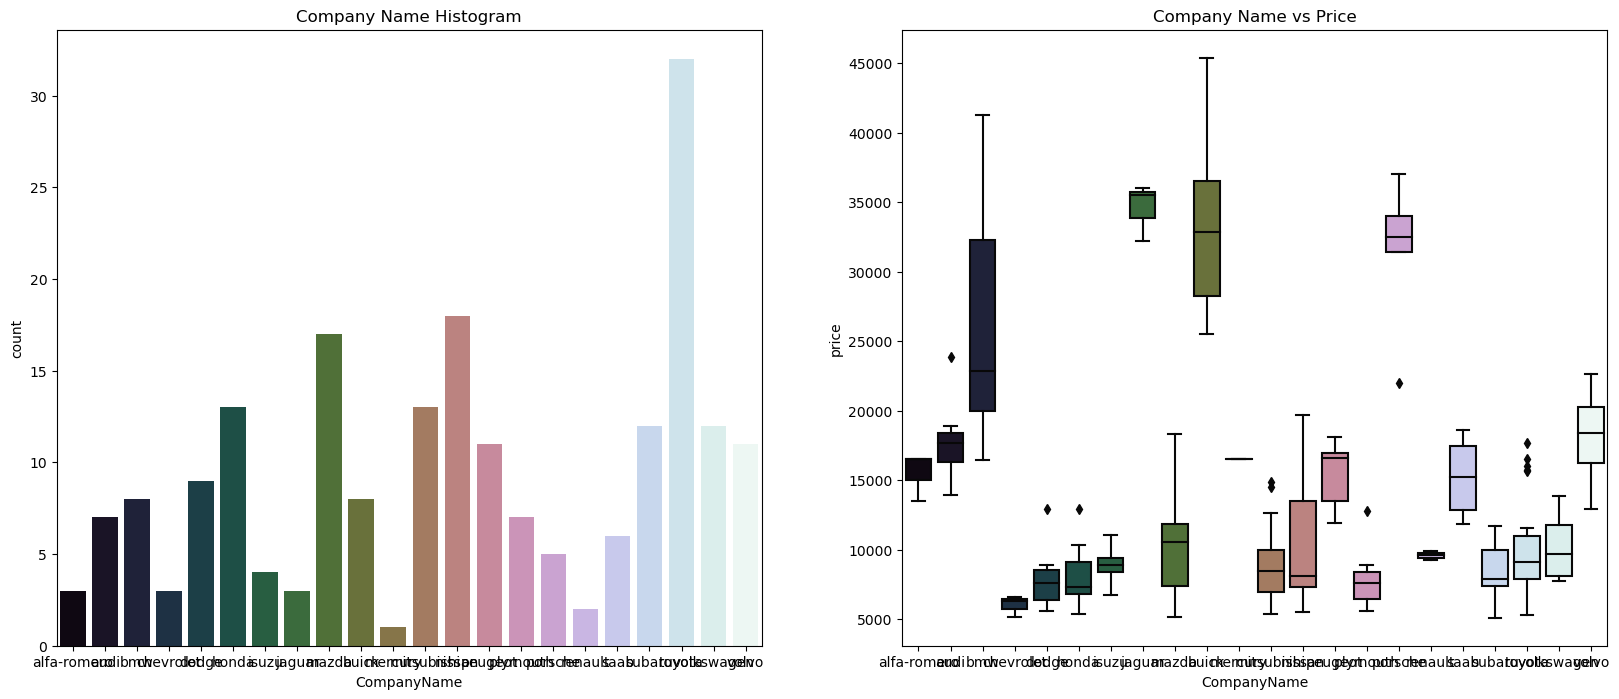

In [26]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Company Name Histogram')
sns.countplot(df.CompanyName, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Company Name vs Price')
sns.boxplot(x=df.CompanyName, y=df.price, palette=("cubehelix"))

plt.show()

C:\Users\jezzg\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


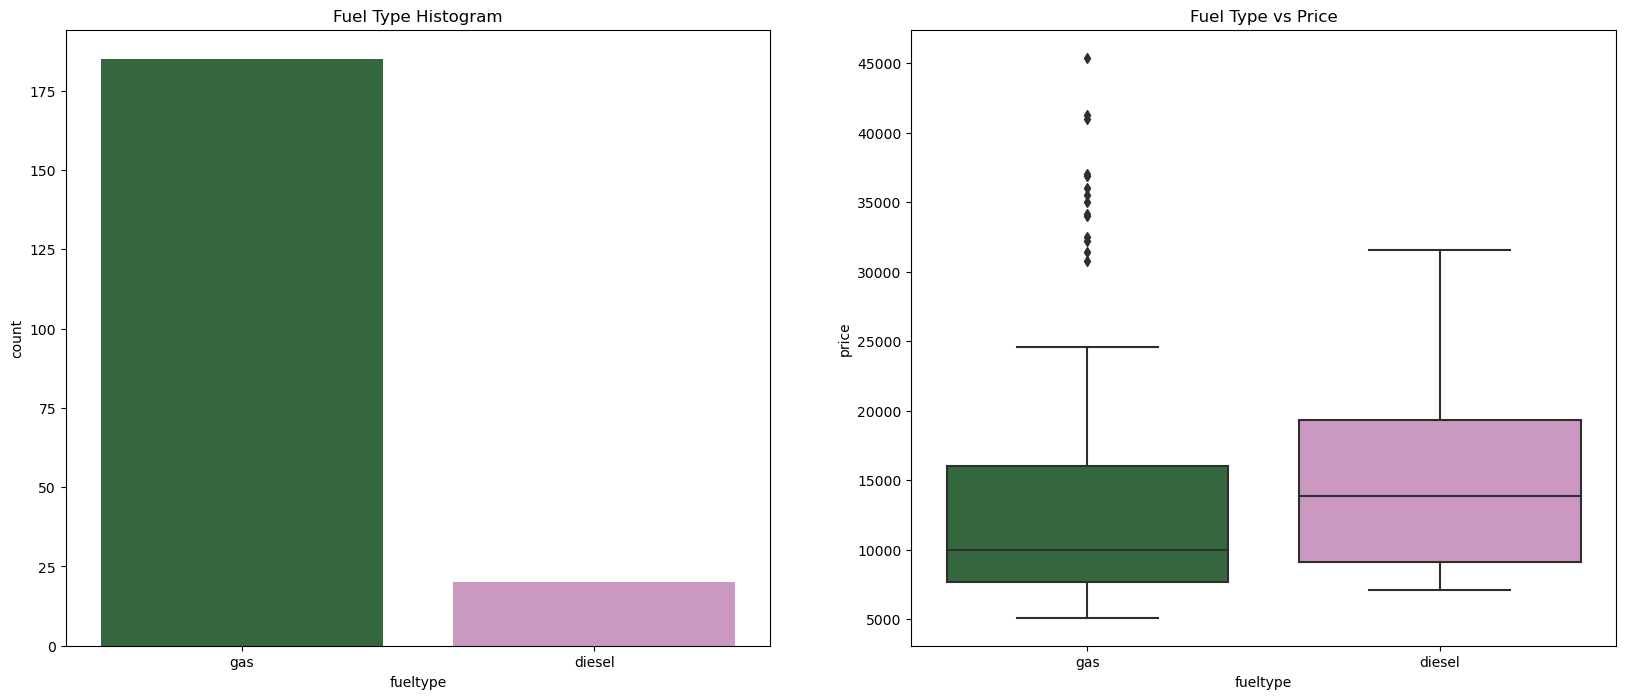

In [67]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Fuel Type Histogram')
sns.countplot(df.fueltype, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Fuel Type vs Price')
sns.boxplot(x=df.fueltype, y=df.price, palette=("cubehelix"))

plt.show()

C:\Users\jezzg\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


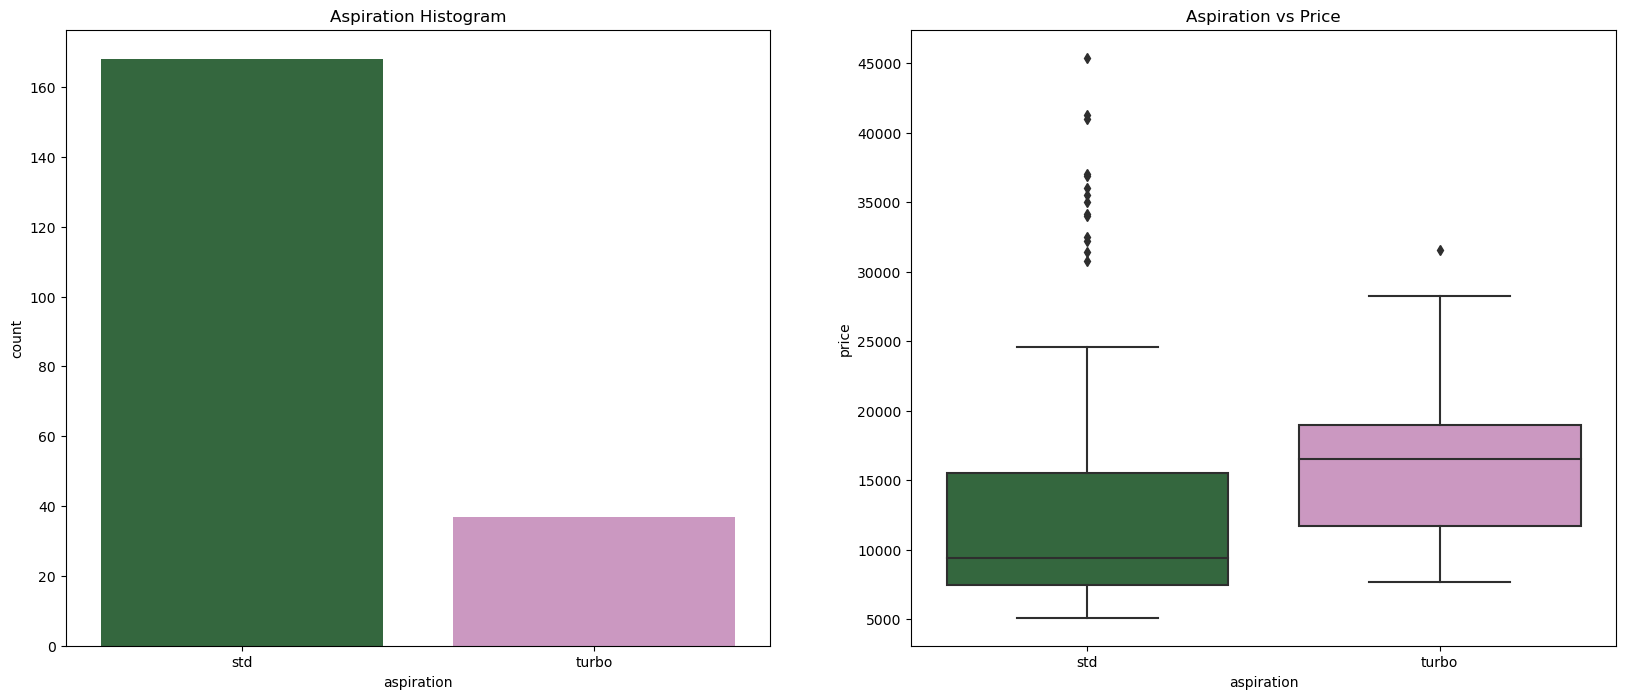

In [68]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(df.aspiration, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=df.aspiration, y=df.price, palette=("cubehelix"))

plt.show()

C:\Users\jezzg\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


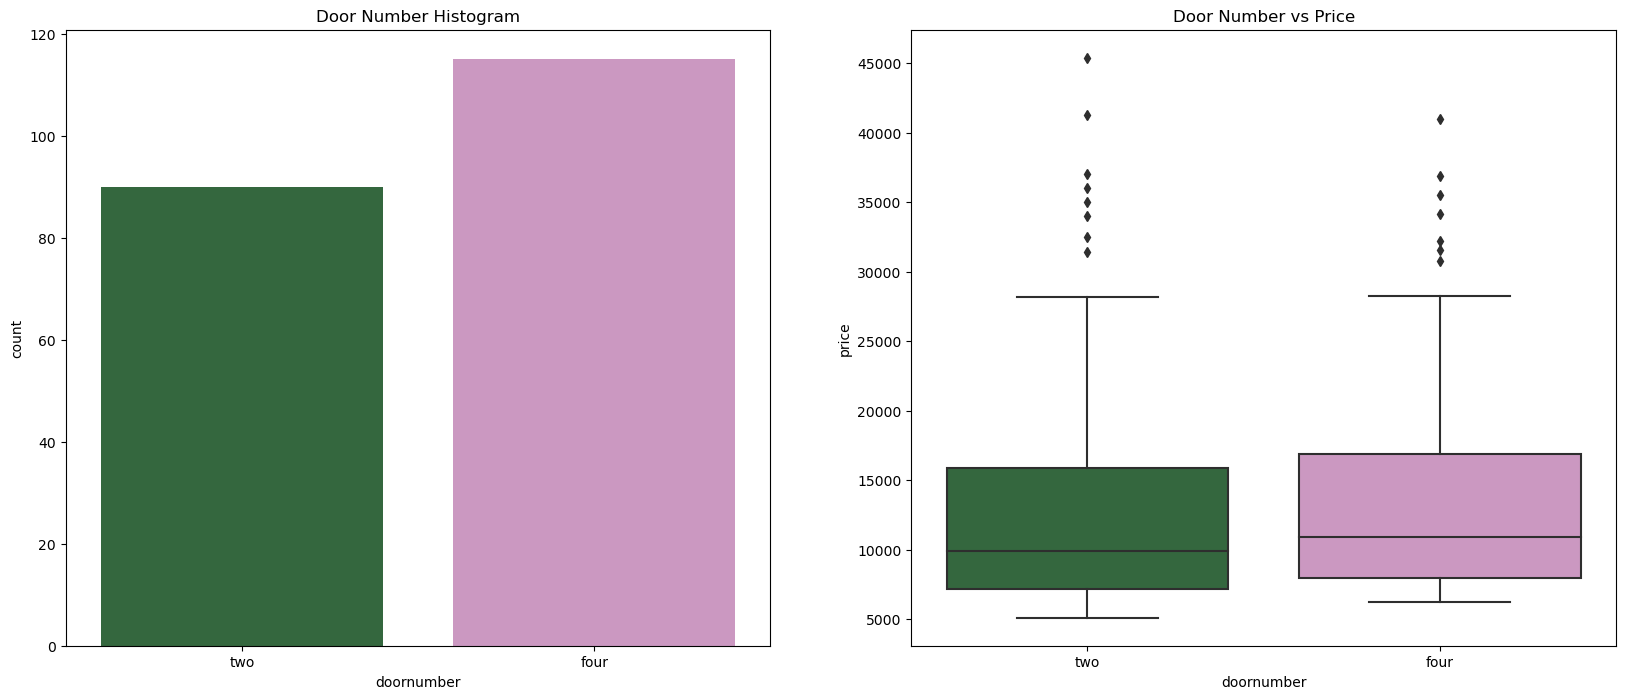

In [69]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(df.doornumber, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=df.doornumber, y=df.price, palette=("cubehelix"))

plt.show()

C:\Users\jezzg\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


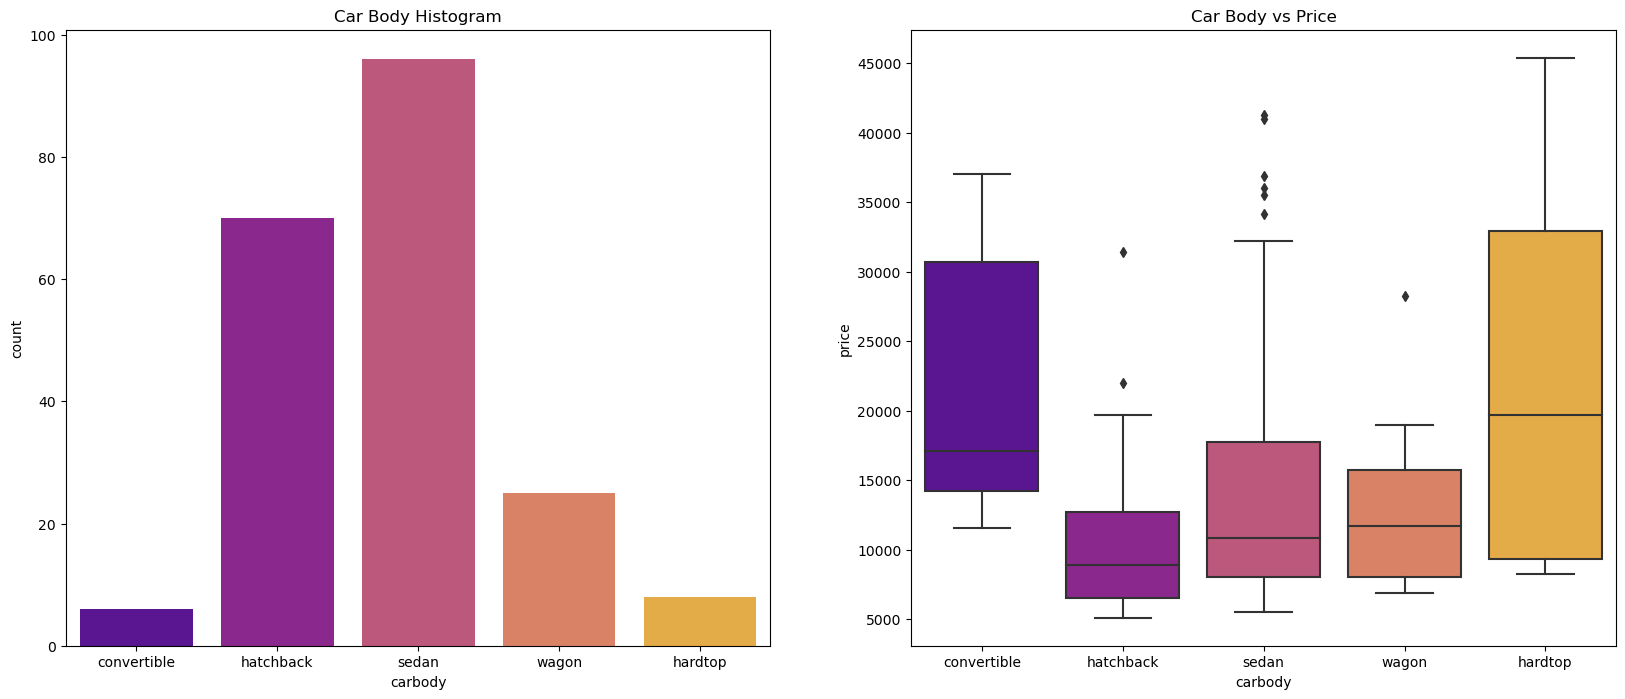

In [70]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Body Histogram')
sns.countplot(df.carbody, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Car Body vs Price')
sns.boxplot(x=df.carbody, y=df.price, palette=("plasma"))

plt.show()

C:\Users\jezzg\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


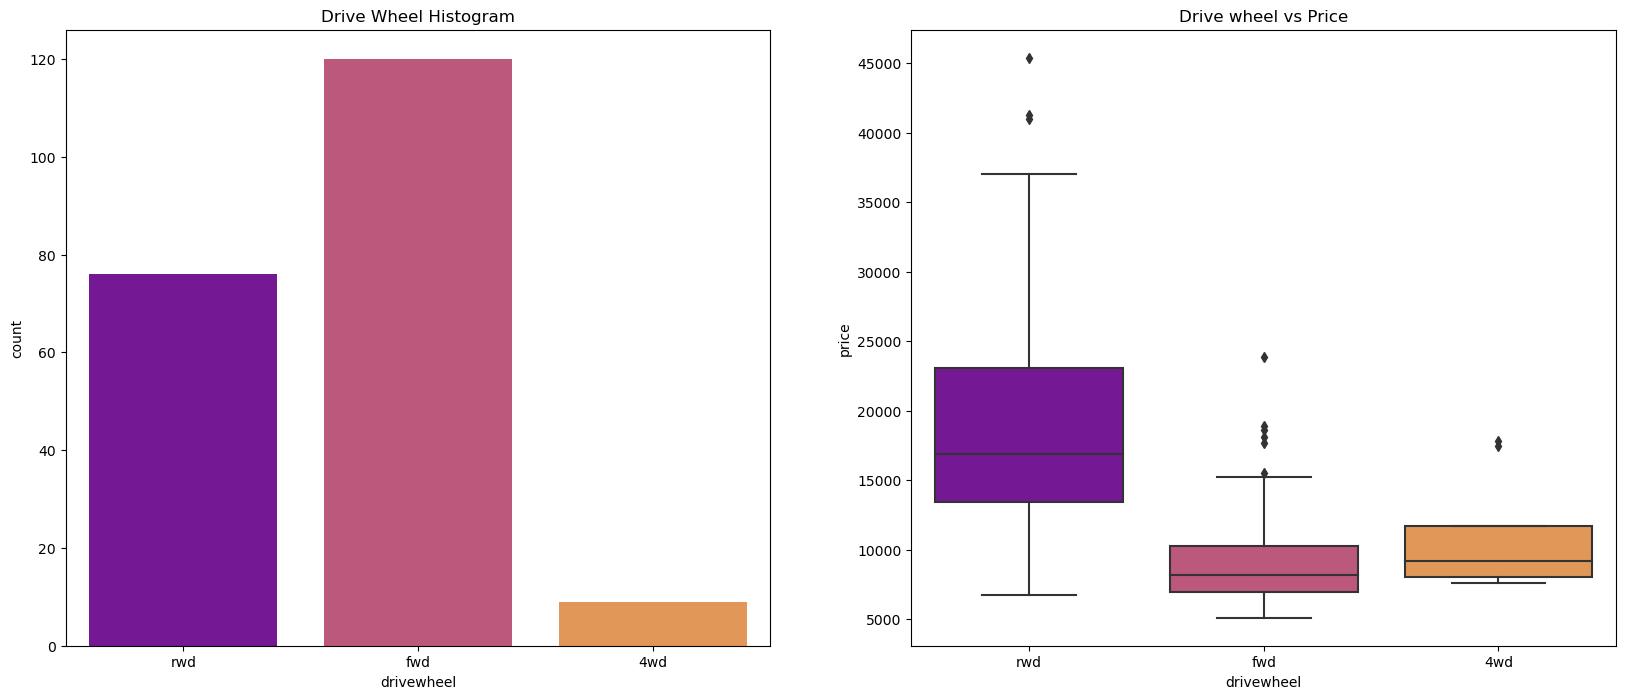

In [72]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Drive Wheel Histogram')
sns.countplot(df.drivewheel, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Drive wheel vs Price')
sns.boxplot(x=df.drivewheel, y=df.price, palette=("plasma"))

plt.show()

C:\Users\jezzg\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


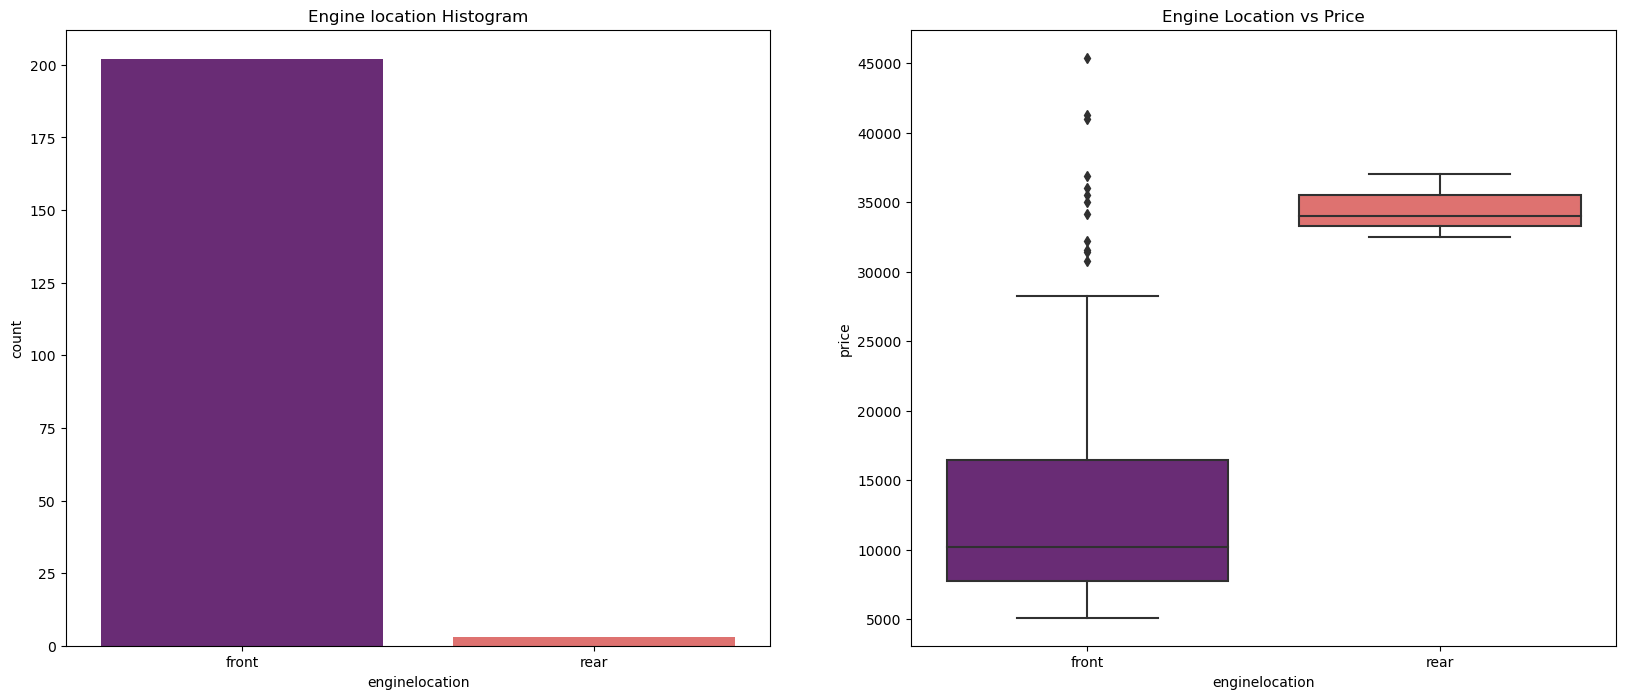

In [73]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine location Histogram')
sns.countplot(df.enginelocation, palette=("magma"))

plt.subplot(1,2,2)
plt.title('Engine Location vs Price')
sns.boxplot(x=df.enginelocation, y=df.price, palette=("magma"))

plt.show()

C:\Users\jezzg\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


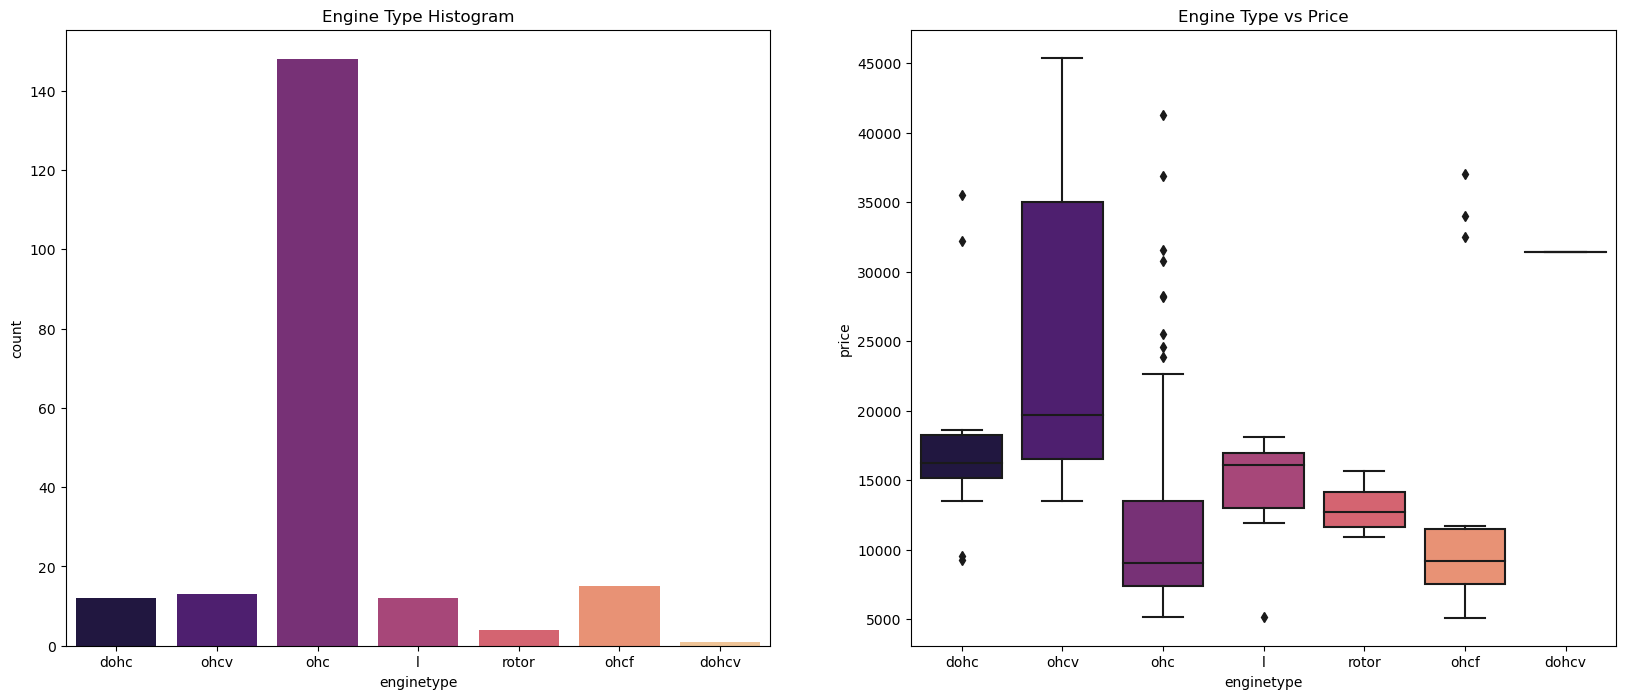

In [74]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(df.enginetype, palette=("magma"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df.enginetype, y=df.price, palette=("magma"))

plt.show()

C:\Users\jezzg\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


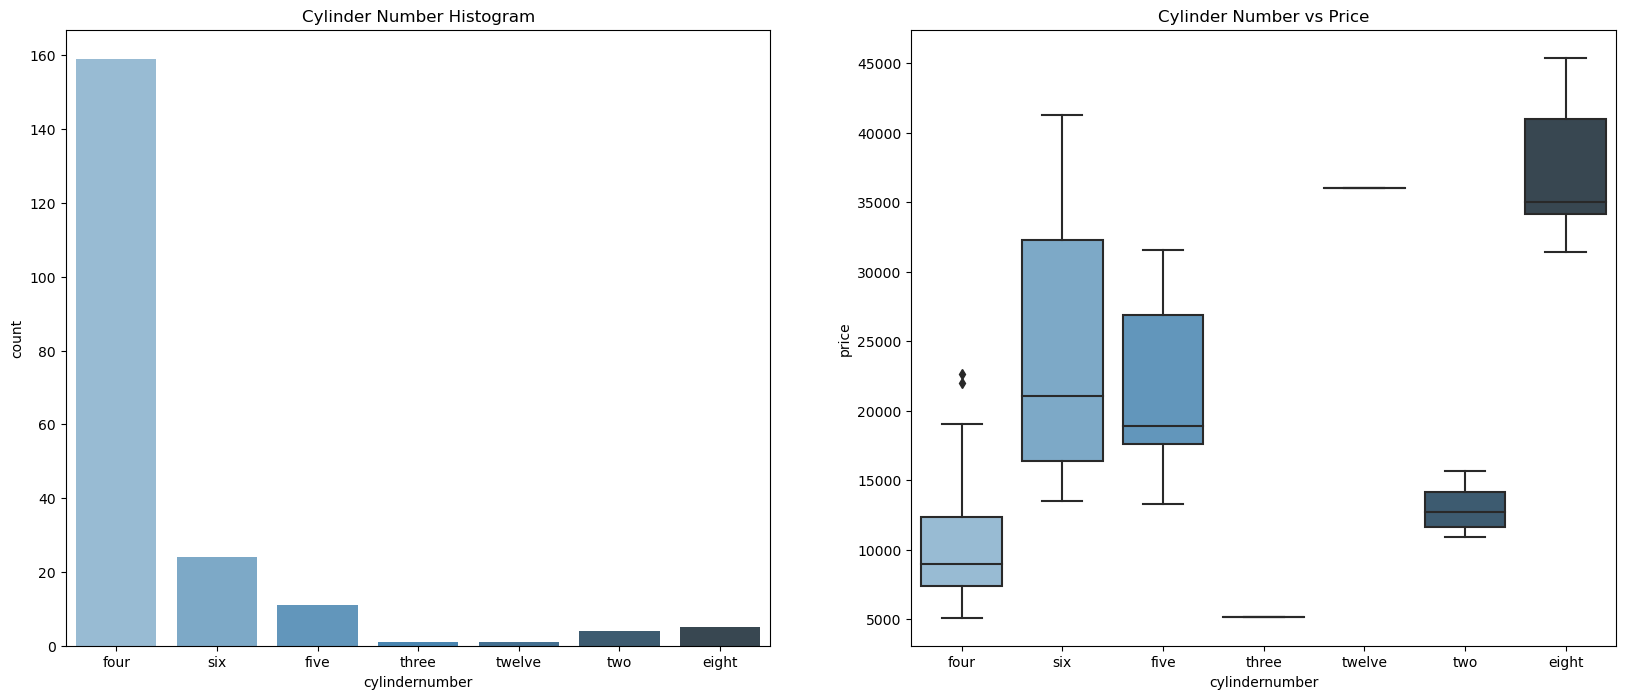

In [79]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Cylinder Number Histogram')
sns.countplot(df.cylindernumber, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Cylinder Number vs Price')
sns.boxplot(x=df.cylindernumber, y=df.price, palette=("Blues_d"))

plt.show()

C:\Users\jezzg\Downloads\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


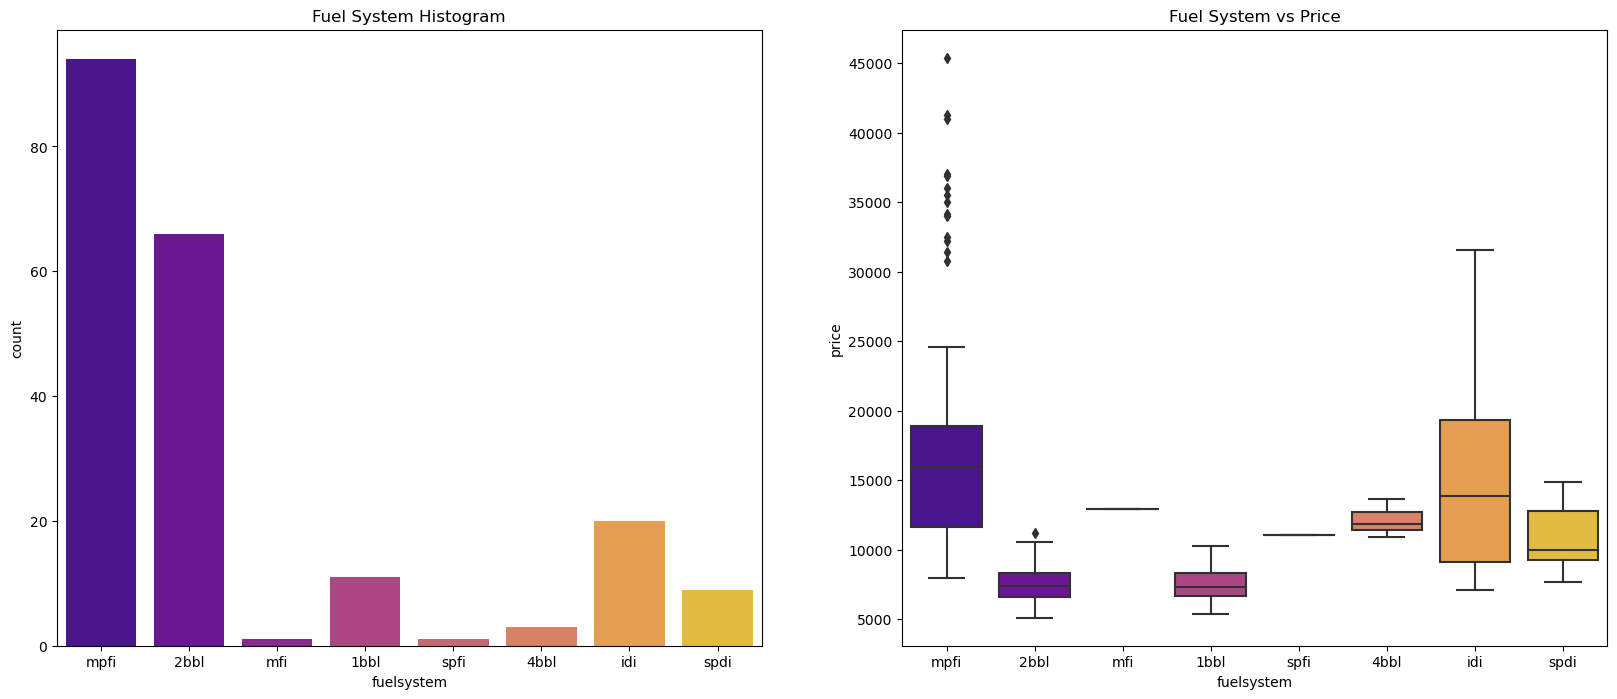

In [80]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Fuel System Histogram')
sns.countplot(df.fuelsystem, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Fuel System vs Price')
sns.boxplot(x=df.fuelsystem, y=df.price, palette=("plasma"))

plt.show()

# Relation of Numeric variables with Price

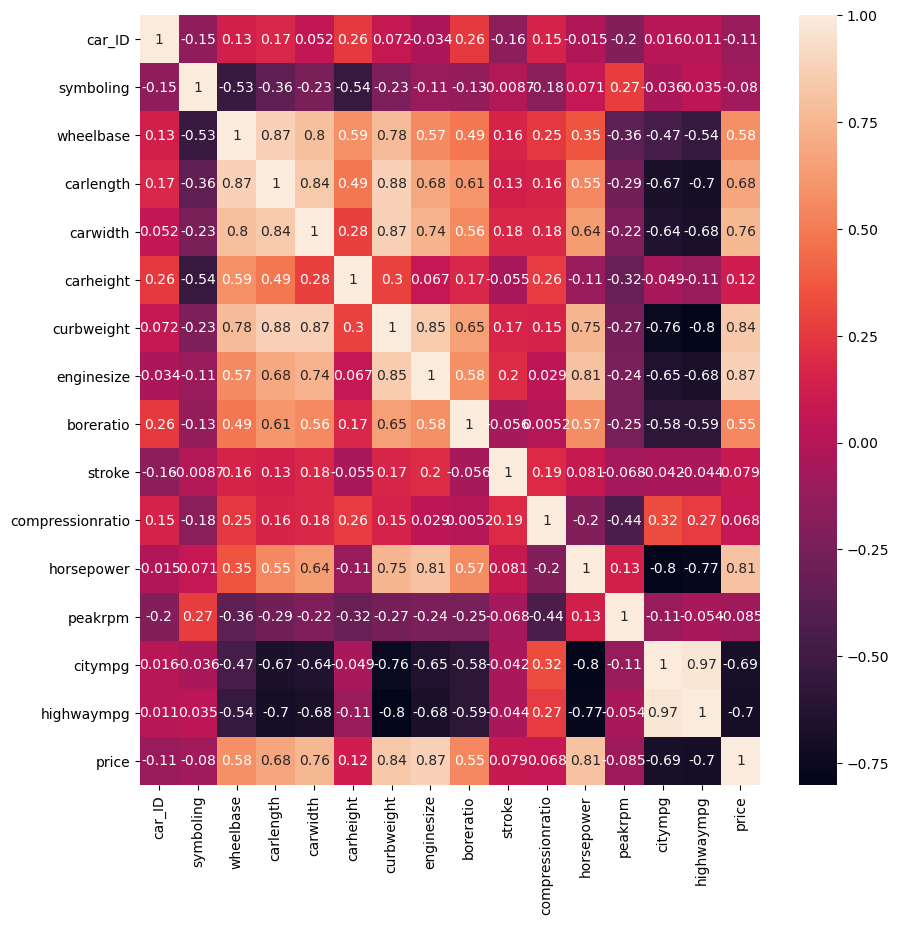

In [44]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Boxplots-If the distribution looks similar for each category(Boxes are in the same line), that means variable has NO effect on the target variable. Hence, the variables are not correlated to each other.
On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Price.In this data, most of the categorical predictors looks correlated with the Target variable

Correlation matrix -It provided the relation between numeric variables and the price. The ones which are highly correlated(above 50%-positive and negative) are selected as significant features for prediction.A positive correlation exists when two variables operate in unison so that when one variable rises or falls, the other does the same. A negative correlation is when two variables move opposite one another so that when one variable rises, the other falls.


From the above figures, we have selected the significant variables to predict the car price 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Fuel System
- Engine Location
- Wheel base
- Curb weight 
- Car Length
- Car width
- Engine Size 
- Bore ratio 
- Horse Power 
- City mpg
- Highway mpg

# Data Preparation

In [21]:
# Splitting significant features as X and target price as Y

In [18]:
X = df.loc[:,["fueltype","aspiration","carbody","drivewheel","enginelocation","wheelbase","enginetype","cylindernumber",
              "fuelsystem", "curbweight", "carlength","carwidth","enginesize","boreratio","horsepower","citympg","highwaympg"]]
y = df["price"]

In [19]:
X.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,enginetype,cylindernumber,fuelsystem,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,citympg,highwaympg
0,gas,std,convertible,rwd,front,88.6,dohc,four,mpfi,2548,168.8,64.1,130,3.47,111,21,27
1,gas,std,convertible,rwd,front,88.6,dohc,four,mpfi,2548,168.8,64.1,130,3.47,111,21,27
2,gas,std,hatchback,rwd,front,94.5,ohcv,six,mpfi,2823,171.2,65.5,152,2.68,154,19,26
3,gas,std,sedan,fwd,front,99.8,ohc,four,mpfi,2337,176.6,66.2,109,3.19,102,24,30
4,gas,std,sedan,4wd,front,99.4,ohc,five,mpfi,2824,176.6,66.4,136,3.19,115,18,22


In [20]:
X.dtypes

fueltype           object
aspiration         object
carbody            object
drivewheel         object
enginelocation     object
wheelbase         float64
enginetype         object
cylindernumber     object
fuelsystem         object
curbweight          int64
carlength         float64
carwidth          float64
enginesize          int64
boreratio         float64
horsepower          int64
citympg             int64
highwaympg          int64
dtype: object

In [21]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [25]:
# Creating dummy variables for categorical variables

In [22]:
df_categorical = X.select_dtypes(include=['object'])
df_categorical

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,convertible,rwd,front,dohc,four,mpfi
1,gas,std,convertible,rwd,front,dohc,four,mpfi
2,gas,std,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,sedan,fwd,front,ohc,four,mpfi
4,gas,std,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,front,ohc,four,mpfi
201,gas,turbo,sedan,rwd,front,ohc,four,mpfi
202,gas,std,sedan,rwd,front,ohcv,six,mpfi
203,diesel,turbo,sedan,rwd,front,ohc,six,idi


In [23]:
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
201,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
202,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
203,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [24]:
X = X.drop(list(df_categorical.columns), axis=1)
X

,wheelbase,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,citympg,highwaympg
0,88.6,2548,168.8,64.1,130,3.47,111,21,27
1,88.6,2548,168.8,64.1,130,3.47,111,21,27
2,94.5,2823,171.2,65.5,152,2.68,154,19,26
3,99.8,2337,176.6,66.2,109,3.19,102,24,30
4,99.4,2824,176.6,66.4,136,3.19,115,18,22
...,...,...,...,...,...,...,...,...,...
200,109.1,2952,188.8,68.9,141,3.78,114,23,28
201,109.1,3049,188.8,68.8,141,3.78,160,19,25
202,109.1,3012,188.8,68.9,173,3.58,134,18,23
203,109.1,3217,188.8,68.9,145,3.01,106,26,27


In [25]:
X = pd.concat([X, df_dummies], axis=1)
X

,wheelbase,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype_gas,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,2548,168.8,64.1,130,3.47,111,21,27,1,...,0,0,0,0,0,0,0,1,0,0
1,88.6,2548,168.8,64.1,130,3.47,111,21,27,1,...,0,0,0,0,0,0,0,1,0,0
2,94.5,2823,171.2,65.5,152,2.68,154,19,26,1,...,0,0,0,0,0,0,0,1,0,0
3,99.8,2337,176.6,66.2,109,3.19,102,24,30,1,...,0,0,0,0,0,0,0,1,0,0
4,99.4,2824,176.6,66.4,136,3.19,115,18,22,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,2952,188.8,68.9,141,3.78,114,23,28,1,...,0,0,0,0,0,0,0,1,0,0
201,109.1,3049,188.8,68.8,141,3.78,160,19,25,1,...,0,0,0,0,0,0,0,1,0,0
202,109.1,3012,188.8,68.9,173,3.58,134,18,23,1,...,0,0,0,0,0,0,0,1,0,0
203,109.1,3217,188.8,68.9,145,3.01,106,26,27,0,...,0,0,0,0,0,1,0,0,0,0


In [35]:
#Training the data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [27]:
X_train.shape

(143, 37)

In [28]:
X_train

,wheelbase,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype_gas,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,93.7,2191,167.3,63.8,98,2.97,68,31,38,1,...,0,0,0,1,0,0,0,0,0,0
125,94.5,2778,168.9,68.3,151,3.94,143,19,27,1,...,0,0,0,0,0,0,0,1,0,0
166,94.5,2300,168.7,64.0,98,3.24,112,26,29,1,...,0,0,0,0,0,0,0,1,0,0
1,88.6,2548,168.8,64.1,130,3.47,111,21,27,1,...,0,0,0,0,0,0,0,1,0,0
199,104.3,3157,188.8,67.2,130,3.62,162,17,22,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,96.3,2403,172.4,65.4,110,3.17,116,23,30,1,...,0,0,0,0,0,0,0,0,1,0
103,100.4,3060,184.6,66.5,181,3.43,152,19,25,1,...,0,0,0,0,0,0,0,1,0,0
67,110.0,3515,190.9,70.3,183,3.58,123,22,25,0,...,0,0,0,0,0,1,0,0,0,0
24,93.7,1967,157.3,63.8,90,2.97,68,31,38,1,...,0,0,0,1,0,0,0,0,0,0


In [29]:
y_train.shape

(143,)

In [30]:
X_test.shape

(62, 37)

In [31]:
y_test.shape

(62,)

In [61]:
# Scaling the features

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [86]:
# Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R-squared: ', r2)
print('MAE: ', mae)

MSE:  9164816.108739449
RMSE:  3027.3447290884214
R-squared:  0.8691284541246633
MAE:  2273.294444221085


Based on the provided metrics, the model appears to perform reasonably well. The RMSE of 3027 indicates that, on average, the predicted values are about 3027 units away from the actual values. The R-squared value of 0.8691 indicates that approximately 87% of the variance in the dependent variable can be explained by the independent variables, which is a good fit for a linear regression model. The MAE of 2273.29 indicates that the average absolute difference between the predicted and actual values is around 2273 units, which is somewhat high but may be acceptable depending on the context of the problem.

In [35]:
y_predict = pd.DataFrame(y_pred, columns = ['Predicted Output'])

In [36]:
y_predict.head()

,Predicted Output
0,9199.775253
1,9966.845420
2,10331.059519
3,6368.046144
4,6515.190071


In [37]:
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

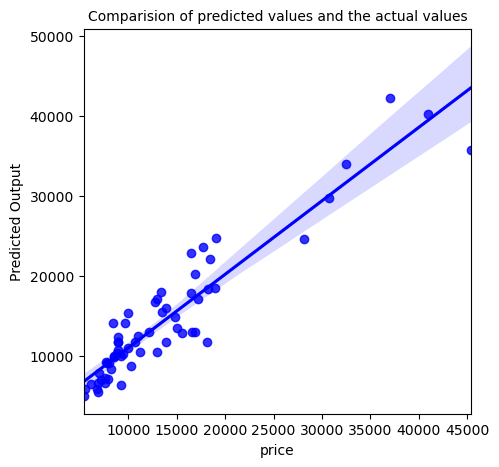

In [38]:
plt.figure(figsize = (5, 5))
sns.regplot(data = results, y = 'Predicted Output', x = 'price', color = 'blue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 10)
plt.show()

In [96]:
# K-Nearest Neighbours

In [53]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R-squared: ', r2)
print('MAE: ', mae)

MSE:  19396583.92516129
RMSE:  4404.155302116546
R-squared:  0.7230210739781325
MAE:  2669.85806451613


Overall, the results suggest that the model is performing reasonably well, as indicated by the relatively low RMSE and MAE values, and the moderately high R-squared value.

In [41]:
y_predict = pd.DataFrame(y_pred, columns = ['Predicted Output'])

In [42]:
y_predict.head()

,Predicted Output
0,7860.4
1,9501.6
2,8748.4
3,12804.2
4,7438.4


In [43]:
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

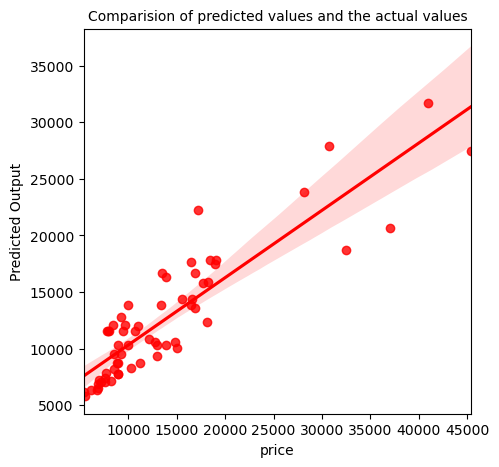

In [109]:
plt.figure(figsize = (5, 5))
sns.regplot(data = results, y = 'Predicted Output', x = 'price', color = 'red', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 10)
plt.show()

In [ ]:
# Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [62]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R-squared: ', r2)
print('MAE: ', mae)

MSE:  6443036.170627936
RMSE:  2538.313647016053
R-squared:  0.9079948693158488
MAE:  1737.8135089247314


In [65]:
y_predict = pd.DataFrame(y_pred, columns = ['Predicted Output'])

In [66]:
y_predict.head()

,Predicted Output
0,8032.860000
1,8651.035000
2,10110.251667
3,9891.600000
4,7318.390000


In [67]:
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

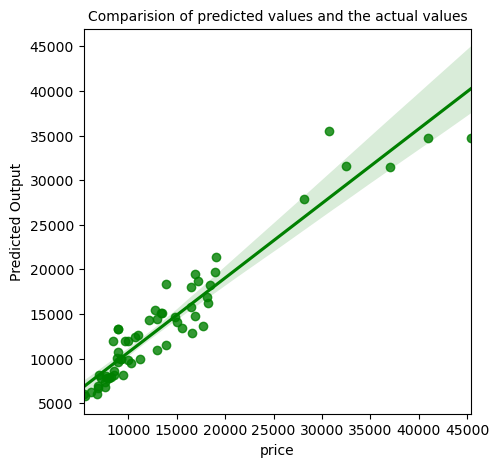

In [68]:
plt.figure(figsize = (5, 5))
sns.regplot(data = results, y = 'Predicted Output', x = 'price', color = 'green', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 10)
plt.show()

Overall, these results suggest that the random forest model is able to explain a large proportion of the variance in the target variable, but there is still a significant amount of error in the predictions. It may be worth exploring other modeling techniques or adjusting the parameters of the random forest to see if the model's performance can be improved.

# Hyperparametric Tuning

In [ ]:
# For Random forest

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=15, n_estimators=200,criterion='mse')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

C:\Users\jezzg\Downloads\New folder\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [82]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R-squared: ', r2)
print('MAE: ', mae)

MSE:  6261020.88291846
RMSE:  2502.2032057605675
R-squared:  0.9105940073446814
MAE:  1693.486443060676


Hyperparameters used:

max_depth: the maximum depth of each decision tree in the random forest model. In this case, it is set to 15, meaning each tree can have at most 15 levels.

n_estimators: the number of decision trees in the random forest. In this case, it is set to 200, meaning the random forest will consist of 200 decision trees.

criterion: the function used to measure the quality of a split. In this case, it is set to 'mse', meaning mean squared error.